##Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Collection and Preprocessing

In [ ]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
df = gold_data.drop(columns = "Date", axis= 1)

## Correlation

In [ ]:
correlation = df.corr()

<Axes: >

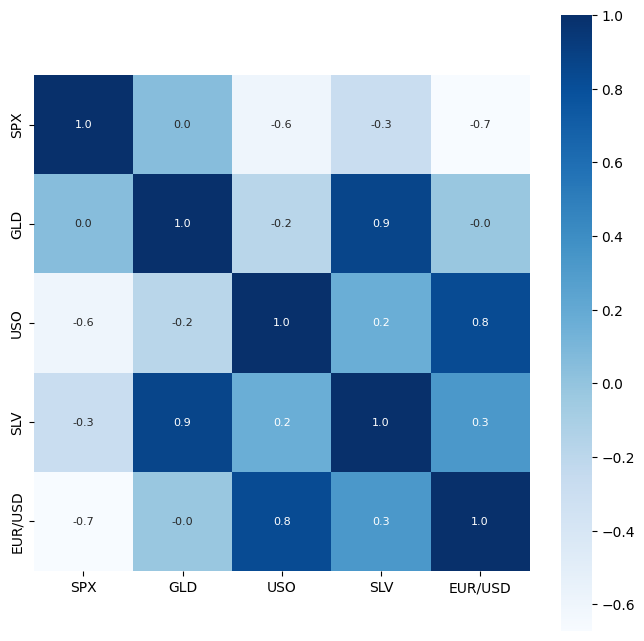

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square= True, fmt= '.1f', annot = True, annot_kws={'size':8}, cmap ='Blues')

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-12-a7576878406c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

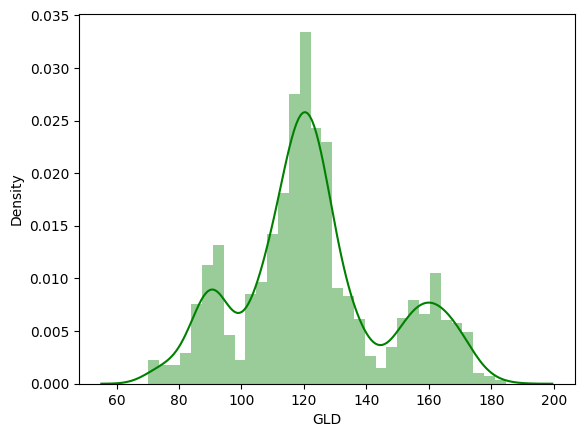

In [ ]:
# checking the distribution plot of gold price
sns.distplot(df['GLD'], color = 'green')

## Splitting the features and targets

In [ ]:
X = df.drop(columns='GLD', axis = 1)
Y = df['GLD']

## Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


## Training the model

In [ ]:
regressor = RandomForestRegressor()

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.13369879  81.888      116.30370053 127.48570072 120.65480147
 154.68539777 150.23559823 126.21260032 117.49979909 125.86990104
 116.44670096 172.67700071 141.61659797 167.554198   115.18920023
 117.80830059 138.64960281 169.82910057 159.90750269 157.08929828
 155.14020027 125.35950015 176.20259911 156.61000371 125.13950041
  93.83769989  77.40550018 120.42749991 119.20169964 167.4325006
  88.22510044 125.35520022  90.99670046 117.88540004 121.01649938
 136.08860066 115.55540115 115.34840093 148.04299957 107.31000077
 103.90270243  87.14229801 126.33880055 117.73799986 152.82929906
 119.67850008 108.29479979 108.15439836  93.19320053 127.23929745
  74.92200032 113.68109909 121.22209993 111.229699   118.90879881
 120.69759956 159.06910057 166.37130126 146.78649674  85.86539871
  94.37949997  86.93059906  90.46909971 118.935001   126.48850066
 127.59760023 169.27939996 122.18479945 117.38199888  98.7393002
 168.39690217 142.86239904 131.61030308 121.14930227 121.27629949
 119.6459009

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.9896982943325703


In [ ]:
Y_test = list(Y_test)

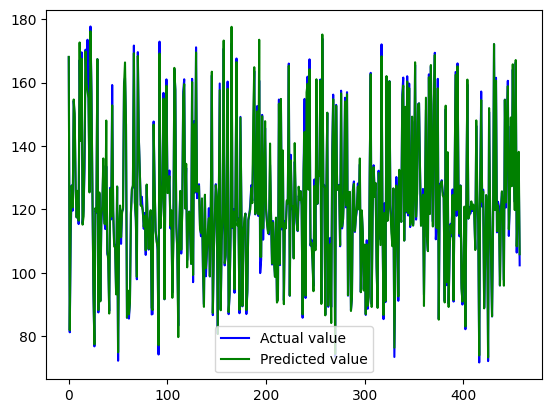

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual value')
plt.plot(test_data_prediction, color='green', label = 'Predicted value')
plt.legend()
plt.show()